In [9]:
from keras.datasets import mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [47]:
print(x_train.shape, y_train.shape, x_test.shape,y_test.shape)

(60000, 28, 28, 1) (60000,) (10000, 28, 28) (10000,)


In [48]:
x_train = x_train.reshape(-1,28,28,1)

In [49]:
x_train.shape

(60000, 28, 28, 1)

In [51]:
x_test = x_test.reshape( -1,28,28,1)

In [52]:
x_test.shape

(10000, 28, 28, 1)

In [56]:
from keras.models import Sequential
from keras.layers import Conv2D, Input, Dropout, Flatten, Dense
from keras.optimizers import SGD
from keras.utils import to_categorical
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

In [63]:
from keras.optimizers import Adam

In [103]:

def cnn():
    model = Sequential()

    model.add(Conv2D(filters=192, kernel_size=(9,9), padding='same', activation='relu', input_shape=(28,28,1)))
    #model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    #model.add(Conv2D(filters=10, kernel_size=(1,1), padding='valid',activation='relu'))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', strides=(2,2)))
    
    #model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    
    #sgd = SGD(lr=0.001, momentum=0.9, decay=1e-4, nesterov=True)
    adam = Adam(lr=0.001)
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [104]:
outmodel = cnn()
#x_train = x_train.reshape((-1, 28, 28, 1))
outmodel.summary()
outmodel.fit(x_train,y_train, validation_data=(x_test,y_test), verbose=1, epochs=1, batch_size=32)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 28, 28, 192)       15744     
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 14, 14, 32)        55328     
_________________________________________________________________
flatten_12 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                62730     
Total params: 133,802
Trainable params: 133,802
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 213s 4ms/step - loss: 0.1951 - acc: 0.9495 - val_loss: 0.1315 - val_acc: 0.9652


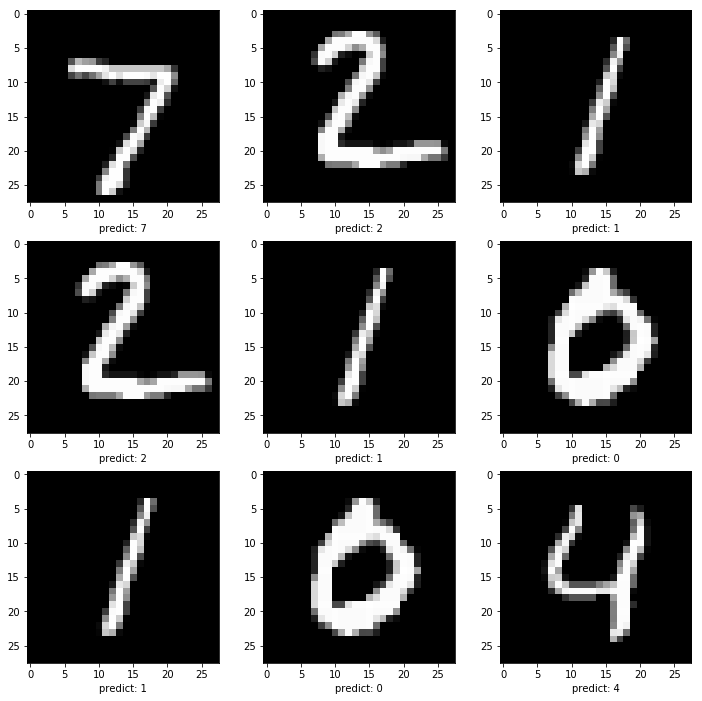

In [119]:
pre = np.argmax(outmodel.predict(x_test[:10]),axis=1)
fig, ax = plt.subplots(3,3, figsize=(12,12))
for i in range(3):
    for j in range(3):
        ax[i][j].imshow(x_test[i+j].reshape(28,28))
        ax[i][j].set_xlabel('predict: {}'.format(pre[i+j]))

plt.show()

In [82]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
x_test[1].reshape(1,28,28)

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 116, 125,
         171, 255, 255, 150,  93,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0, 169, 253, 253,
         253, 253, 253, 253, 218,  30,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0, 169, 253, 253, 253,
         213, 142, 176, 253, 253, 122,   0,   0,   0,   0,   0,   0,
           0,   0,   0